<a href="https://colab.research.google.com/github/s34836/WUM/blob/main/Lab_04_Multilayer_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi-layer Networks

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

mlb = MultiLabelBinarizer()
mlb.fit(train_data + test_data)
X_train_full = mlb.transform(train_data)
y_train_full = train_labels
X_test = mlb.transform(test_data)
y_test = test_labels

X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=0.33, random_state=42)


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train, y_train)
knn.score(X_valid, y_valid)

0.6416969696969697

In [3]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=X_train[0].shape),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.05),
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [4]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │       159,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 160,273 (626.07 KB)

 Trainable params: 160,273 (626.07 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), batch_size=32, epochs=15)

Epoch 1/15
524/524 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7427 - loss: 0.5211 - val_accuracy: 0.8632 - val_loss: 0.3199
Epoch 2/15
524/524 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8887 - loss: 0.2739 - val_accuracy: 0.8690 - val_loss: 0.3155
Epoch 3/15
524/524 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9141 - loss: 0.2187 - val_accuracy: 0.8636 - val_loss: 0.3292
Epoch 4/15
524/524 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9254 - loss: 0.1911 - val_accuracy: 0.8619 - val_loss: 0.3600
Epoch 5/15
524/524 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9419 - loss: 0.1537 - val_accuracy: 0.8655 - val_loss: 0.3405
Epoch 6/15
524/524 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9471 - loss: 0.1299 - val_accuracy: 0.8688 - val_loss: 0.3522
Epoch 7/15
524/524 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9594 - loss: 0.1089 - val_accuracy: 0.8521 - val_loss: 0.5080
Epoch 8/15
524/524 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9692 - loss: 0.0835 - val_accuracy: 0.

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


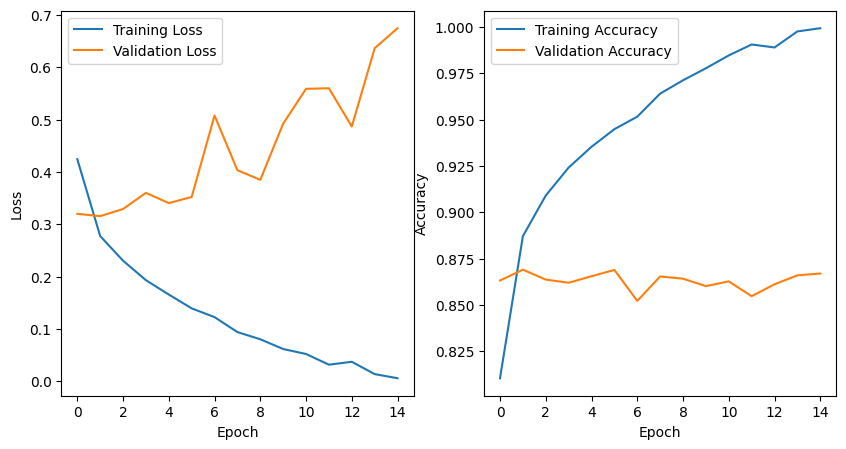

In [6]:
import matplotlib.pyplot as plt

fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(10, 5))

loss = history.history["loss"]
val_loss = history.history["val_loss"]
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
print(history.history.keys())
epoch = range(len(loss))

ax1.plot(epoch, loss, label="Training Loss")
ax1.plot(epoch, val_loss, label="Validation Loss")
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss")
ax1.legend()

ax2.plot(epoch, accuracy, label="Training Accuracy")
ax2.plot(epoch, val_accuracy, label="Validation Accuracy")
ax2.set_xlabel("Epoch")
ax2.set_ylabel("Accuracy")
ax2.legend()

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.05),
              loss="binary_crossentropy",
              metrics=["accuracy"])

model.fit(X_train_full, y_train_full, batch_size=32, epochs=5)

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7533 - loss: 0.5005
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8925 - loss: 0.2684
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9077 - loss: 0.2284
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9230 - loss: 0.1961
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9342 - loss: 0.1749


In [8]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8548 - loss: 0.3563


In [9]:
from IPython.display import Markdown
Markdown(f"## Test loss: {test_loss:.2f} \n ## Test accuracy: {test_accuracy:.2f}")

## Test loss: 0.36 
 ## Test accuracy: 0.86

## Tasks

1. [TensorFlow Playground](https://playground.tensorflow.org) is a neural network simulator and visualization tool. Create a few networks with different architectures and check how they will be affected by different hyperparameters.
2. Create a network to classify the MNIST dataset.
    - Test a few different network topologies (different numbers and sizes of hidden layers) and hyperparameters, such as hidden layer activation functions (`sigmoid`, `tanh`, `relu`, ...).
    - The size of the output layer should correspond to the number of classes (10). The output layer should use the `softmax` activation function.
    - Use `loss="sparse_categorical_crossentropy"`.

In [4]:
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=0.1, random_state=1)

X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:

tf.config.run_functions_eagerly(True)
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=0.1, random_state=1)

X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.
# Spłaszczenie
X_train = X_train.reshape(len(X_train), -1)
X_valid = X_valid.reshape(len(X_valid), -1)
X_test = X_test.reshape(len(X_test), -1)

def build_and_train_model(shapeTrain, hidden_layers, activation, optimizer=None, epochs=2, lr=0.1):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Input(shape=shapeTrain))
    for units in hidden_layers:
        model.add(tf.keras.layers.Dense(units, activation=activation))
    model.add(tf.keras.layers.Dense(10, activation="softmax"))

    if optimizer is None:
        optimizer = tf.keras.optimizers.SGD(learning_rate=lr)

    model.compile(
        optimizer=optimizer,
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )

    history = model.fit(
        X_train, y_train,
        validation_data=(X_valid, y_valid),
        epochs=epochs,
        batch_size=64,
        verbose=0
    )

    val_acc = history.history["val_accuracy"][-1]
    if hasattr(val_acc, "numpy"):
        val_acc = val_acc.numpy()
    val_acc = float(val_acc)
    print(f"Layers={hidden_layers}, Activation={activation}, Val acc={val_acc:.4f}")

    return model, history

# --- konfiguracje

configs = [
    {"hidden_layers": [32], "activation": "sigmoid"},
    {"hidden_layers": [64], "activation": "tanh"},
    {"hidden_layers": [128], "activation": "relu"},
    {"hidden_layers": [128, 64], "activation": "relu"},
    {"hidden_layers": [256, 128, 64], "activation": "relu"},
]
results = []
for cfg in configs:
    model, history = build_and_train_model(shapeTrain=X_train.shape[1:], **cfg)
    results.append((cfg, model, history))



11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Layers=[32], Activation=sigmoid, Val acc=0.9060
Layers=[64], Activation=tanh, Val acc=0.9307


KeyboardInterrupt: 